## Predict Pneumonia Status From X-Ray

### The purpose is to develop artificial intelligence (AI) tools for radiology to detect pneumonia in patient.
### The data is sourced from the Radiological Society of North America (RSNA)
### The data source is 3.96 GB in size so I am only going to reference it and not upload it.
### Data Source: https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

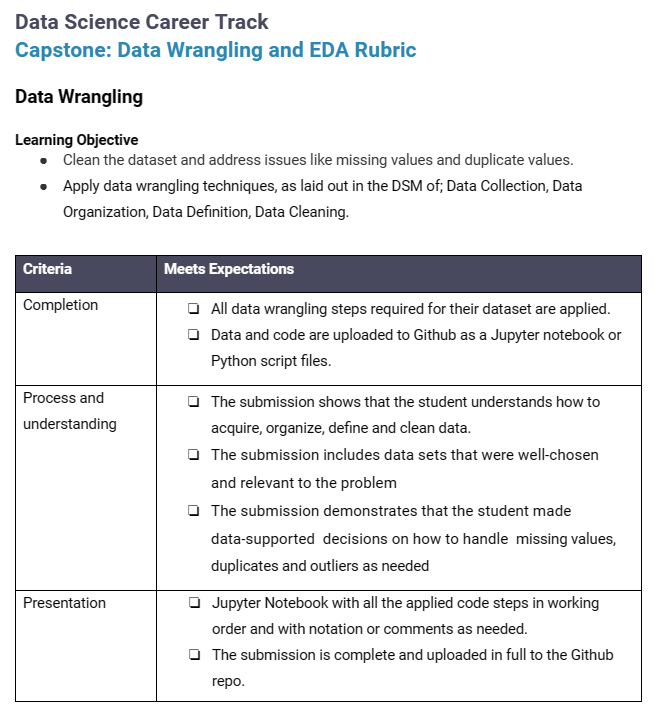

In [1]:
# Import necessary libraries
import os
import hashlib
import time
from collections import defaultdict

In [12]:
# Count number of images in the test and train directories

def count_files(directory):
    """Count the number of files in the specified directory."""
    return sum(os.path.isfile(os.path.join(directory, f)) for f in os.listdir(directory))

# Directory path 
directory_path = 'Data/test_images'
num_files = count_files(directory_path)
print(f"There are {num_files} files in the {directory_path} directory.")


There are 3000 files in the Data/test_images directory.


In [13]:
# Count number of images in the test and train directories

def count_files(directory):
    """Count the number of files in the specified directory."""
    return sum(os.path.isfile(os.path.join(directory, f)) for f in os.listdir(directory))

# Directory path 
directory_path = 'Data/train_images'
num_files = count_files(directory_path)
print(f"There are {num_files} files in the {directory_path} directory.")


There are 26684 files in the Data/train_images directory.


In [2]:
# Check for duplicate images using hashes 
def calculate_file_hash(filepath, hash_algo=hashlib.sha256):
    """Calculate the hash of a file using the specified hash algorithm."""
    hash_obj = hash_algo()
    with open(filepath, 'rb') as file:
        for chunk in iter(lambda: file.read(4096), b""):
            hash_obj.update(chunk)
    return hash_obj.hexdigest()

In [3]:
# Check for duplicate images  
def find_duplicates(directory):
    """Find and return a list of duplicates in the given directory."""
    hashes = defaultdict(list)
    for root, dirs, files in os.walk(directory):
        for filename in files:
            filepath = os.path.join(root, filename)
            file_hash = calculate_file_hash(filepath)
            hashes[file_hash].append(filepath)
    # Filter out hash keys that have only one file (i.e., unique files)
    duplicates = {hash: paths for hash, paths in hashes.items() if len(paths) > 1}
    return duplicates

In [6]:
# Set the directory path
directory_path = 'Data/test_images'
duplicates = find_duplicates(directory_path)

# Print out the duplicates
for hash_value, files in duplicates.items():
    print(f"Duplicate files for hash {hash_value}:")
    for file in files:
        print(file)

In [7]:
# Set the directory path
directory_path = 'Data/test_images'
duplicates = find_duplicates(directory_path)

# Print out the duplicates
for hash_value, files in duplicates.items():
    print(f"Duplicate files for hash {hash_value}:")
    for file in files:
        print(file)